### Salary Predictor - SageMaker

#### Goals of the project:

1. Basics of Regression
2. Basics of SageMaker
3. How to build a model
4. How to train a model
5. How to deploy and make inferences

#### Project Overview:

1. Objective: Predict the employee salary based on the number of years of experience.

2. Nature of Data: Simple format - Simple case study

#### We have two columns:

1. Inputs

2. Outputs

#### HR CASE STUDY
We will assume that the number of years of experience determines the salary. For example, an employee passes the interviews, the HR team can look at the previous years of experience (YOE), and offer them a compensation based on that.

We need to develop a regression based model, relate the two models and focus on a Mathematical, Machine Learning Model.

#### Deliverables:

1. Create a Linear Regression Model
2. If we feed in the number of experiences, the salary should be generated.


#### IMPORTING LIBRARIES AND DATASETS

In [2]:
## Pandas used for dataset manipulations
import pandas as pd

## Numpy used for numerical analysis
import numpy as np

## Used to perform visualizations and plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Represents reading the given csv file
employeeSalary_df = pd.read_csv('salary.csv')

In [4]:
## Represents printing out the head of the data
employeeSalary_df


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [5]:
employeeSalary_df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


Here, we see 35 entries, two columns: years of experience and the corresponding salary based on the YOE.

#### DATA ANALYSIS & VISUALIZATION

In [6]:
## Respresents checking for possible null values
sns.heatmap(employeeSalary_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [7]:
## Looking for information
employeeSalary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [8]:
max = employeeSalary_df[employeeSalary_df['Salary'] == employeeSalary_df['Salary'].max()]
print(max)

min = employeeSalary_df[employeeSalary_df['Salary'] == employeeSalary_df['Salary'].min()]
print(min)

    YearsExperience  Salary
34             13.5  139465
   YearsExperience  Salary
2              1.5   37731


In [9]:
employeeSalary_df.hist(bins=30, figsize=(20, 10), color='r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0931441510>,
      dtype=object)

In [10]:
print(sns.pairplot(employeeSalary_df))


#### Training & Testing

In [11]:
X = employeeSalary_df[['YearsExperience']]
y = employeeSalary_df[['Salary']]

In [12]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [13]:
y

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


In [14]:
X.shape

(35, 1)

In [15]:
y.shape

(35, 1)

In [16]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [17]:
print (X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]
 [11.2]
 [11.5]
 [12.3]
 [12.9]
 [13.5]]


In [18]:
print (y)

[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]
 [127345.]
 [126756.]
 [128765.]
 [135675.]
 [139465.]]


In [19]:
## Represents splitting the data now into training data and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [20]:
X_train.shape

(26, 1)

In [21]:
X_test.shape

(9, 1)

#### TRAINING A LINEAR REGRESSION MODEL IN SK-LEARN

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regression_model_sklearn = LinearRegression(fit_intercept = True)
regression_model_sklearn.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
regression_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regression_model_sklearn_accuracy

0.942986454626732

Achieving 97% accuracy on the data above

#### EVALUATING TRAINED MODEL PERFORMANCE

In [24]:
y_predict = regression_model_sklearn.predict(X_test)

In [25]:
print (y_predict)

[[ 53147.883]
 [ 79282.3  ]
 [125453.09 ]
 [128066.53 ]
 [ 99318.67 ]
 [ 54019.027]
 [ 74055.414]
 [103674.42 ]
 [ 60117.06 ]]


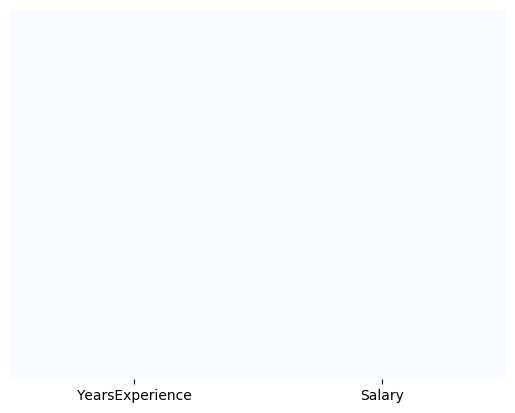

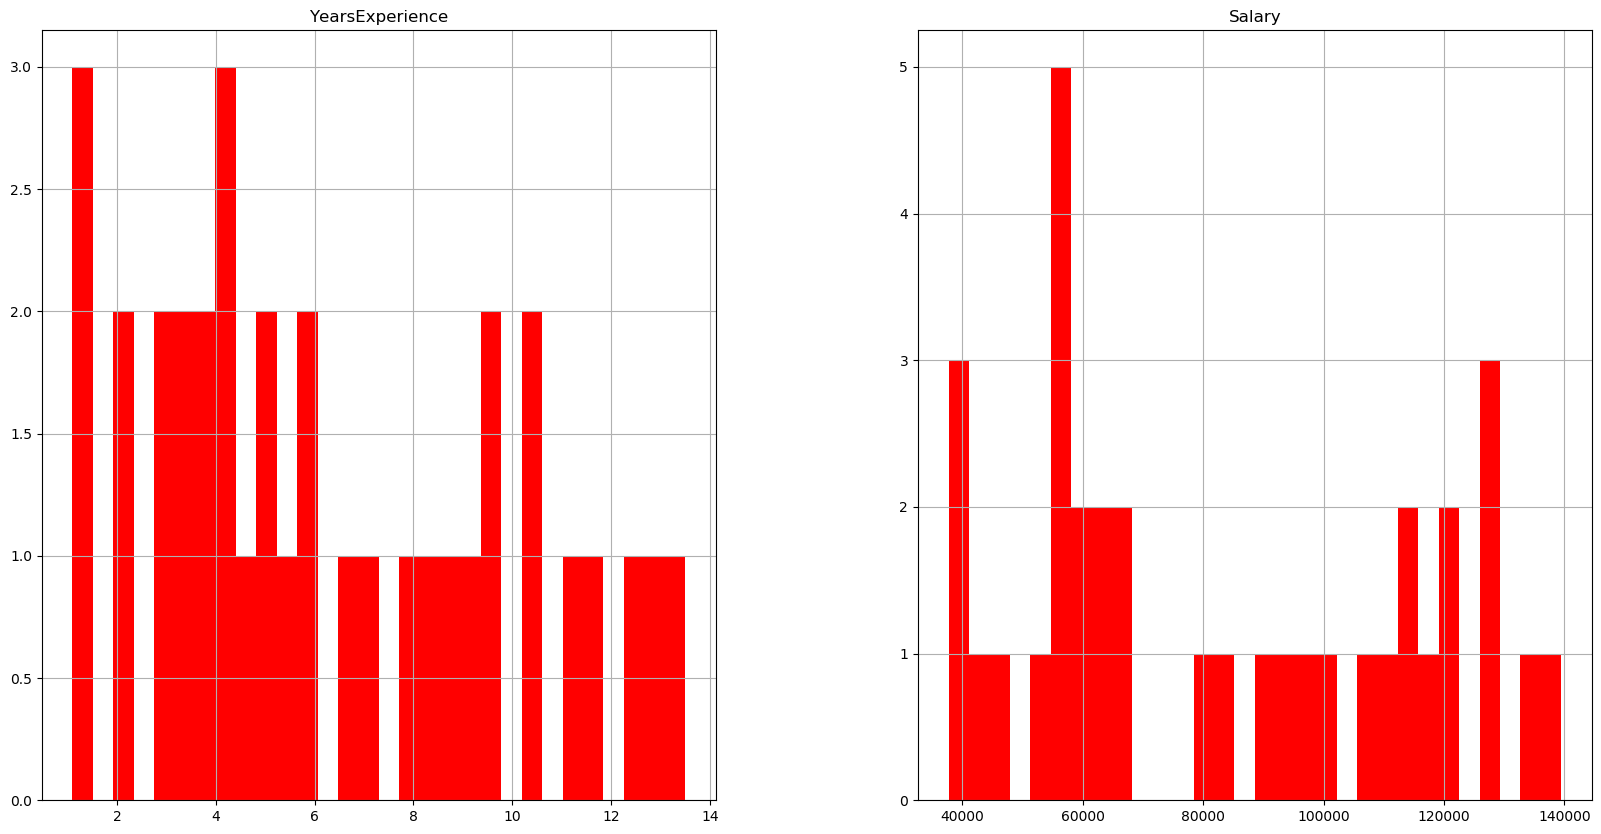

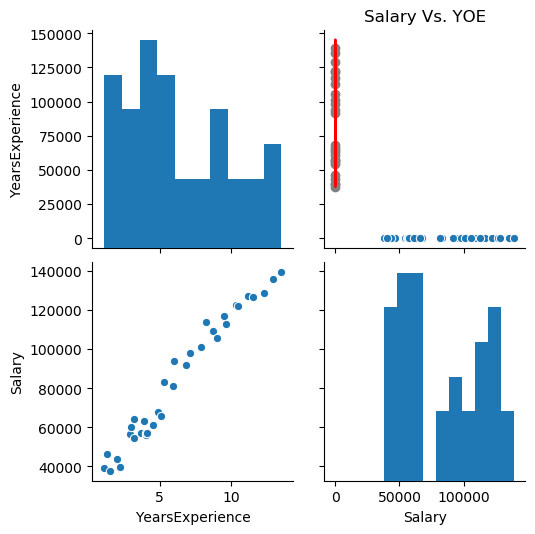

In [26]:
plt.scatter(X_train, y_train, color = 'grey')
plt.plot(X_train, regression_model_sklearn.predict(X_train), color = 'red')
plt.ylabel('Salary')
plt.xlabel('Number of Years of Experience')
plt.title('Salary Vs. YOE')
plt.show()

#### TRAINING LINEAR LEARNER MODEL USING SAGEMAKER

In [27]:
import sagemaker

## AWS Software Dev. Kit
import boto3

## Represents creating the sagemaker session
sagemaker_session = sagemaker.Session()

## Represents storing the data in the S3 bucket
bucket = 'my-demo-ml-dataset'

## Represents the folder
prefix = 'linear_learner'

role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::442851008302:role/service-role/AmazonSageMaker-ExecutionRole-20230713T114638


In [28]:
X_train.shape

(26, 1)

In [29]:
y_train = y_train[:,0]

In [30]:
y_train.shape

(26,)

In [31]:
## Represents importing other libraries
import io
import numpy as np
import sagemaker.amazon.common as smac

buf = io.BytesIO()

## Using the smac to convert numpy to record format and get the format
## to be accepted by sagemaker linear learner
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0)

0

In [32]:
import os

## Now, we need to upload the data in s3, and the linear learner will capture the data from there

## Key refers to the name of the file
key = 'linear-train-data'

## Now, uploading the data to s3
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

## To pring the data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)


In [33]:
X_test.shape

(9, 1)

In [34]:
## To create a location where we will store the output data
output_location = 's3://{}/{}/output'.format(bucket, prefix)


In [39]:
## Now, we will obtain the reference to the linear learner container image

from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'linear-learner')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [ ]:
## Represents passing the instance, role, and sagemaker session to the container

linear = sagemaker.estimator.Estimator(container, 
                                      role, 
                                      train_instance_count = 1,
                                      train_instance_type = 'ml.c4.xlarge',
                                      output_path = output_location, 
                                      sagemaker_session = sagemaker_session)

linear.set_hyperparameters(feature_dim = 1, 
                           predictor_type = 'regressor',
                           mini_batch_size = 5,
                           epochs = 50, 
                           num_models = 32,
                           loss = 'absolute_loss')

linear.fit({'train': s3_train_data})

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: linear-learner-2023-07-20-23-01-35-544


2023-07-20 23:01:35 Starting - Starting the training job...
2023-07-20 23:01:53 Starting - Preparing the instances for training......

#### DEPLOY & TEST THE TRAINED LINEAR LEARNER MODEL

In [42]:
## Represents deploying the model to perform inference

linear_regressor = linear.deploy(initial_instance_count = 1, 
                                 instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: linear-learner-2023-07-20-22-54-01-131
INFO:sagemaker:Creating endpoint-config with name linear-learner-2023-07-20-22-54-01-131
INFO:sagemaker:Creating endpoint with name linear-learner-2023-07-20-22-54-01-131


---------!

In [ ]:
!{sys.executable} -m pip install sagemaker==1.72.0 -U
from sagemaker.predictor import csv_serializer, json_deserializer

## Represents in order to make inferences on model, pass data in text and csv format

linear_regressor.content_type = 'text/csv'
linear_regressor.serializer = csv_serializer
linear_regressor.deserializer = json_deserializer

In [ ]:
## Represents making predictions on the test data that we have

predictedResult = linear_regressor.predict(X_test)

print (predictedResult)

In [ ]:
## results are stored in the json format, so we iterate through the results and get the value corresponding to the score

predictions = np.array ([r['score'] for r in result['predictions']])

print (predictions)

In [ ]:
predictions.shape